In [2]:
import rioxarray as rxr

rema = rxr.open_rasterio(
    "C:/Users/Ashley Howard/ESS569/rema_mosaic_100m_v2.0_dem.tif",
    masked=True
).squeeze()

print(rema)


<xarray.DataArray (y: 58422, x: 54502)> Size: 13GB
[3184115844 values with dtype=float32]
Coordinates:
  * y            (y) float64 467kB 3.342e+06 3.342e+06 ... -2.5e+06 -2.5e+06
  * x            (x) float64 436kB -2.7e+06 -2.7e+06 ... 2.75e+06 2.75e+06
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0


In [3]:
print(rema.rio.crs)


EPSG:3031


In [4]:
import xarray as xr

file = "C:/Users/Ashley Howard/ESS569/MLGEO2026_Subglacial_Lakes/Notebooks/cryosat_downloads/CS_OFFL_THEM_GRID__ANTARCTIC_2018_08_V201.nc"
ds = xr.open_dataset(file)

print(ds)

<xarray.Dataset> Size: 52MB
Dimensions:      (x: 2750, y: 2350, time: 1, nv: 2)
Coordinates:
  * x            (x) float32 11kB -2.699e+06 -2.697e+06 ... 2.797e+06 2.799e+06
  * y            (y) float32 9kB -2.399e+06 -2.397e+06 ... 2.297e+06 2.299e+06
  * time         (time) int32 4B 1534291200
  * nv           (nv) int32 8B 0 1
Data variables:
    elevation    (x, y, time) float32 26MB ...
    uncertainty  (x, y, time) float32 26MB ...
    x_bnds       (x, nv) float32 22kB ...
    y_bnds       (y, nv) float32 19kB ...
Attributes: (12/35)
    cdm_data_type:                Gridded
    Conventions:                  CF-1.7
    Metadata_Conventions:         Unidata Dataset Discovery v1.0
    contact:                      support@cryotempo-eolis.org
    creator_email:                support@cryotempo-eolis.org
    creator_url:                  http://cryotempo-eolis.org/
    ...                           ...
    project:                      CryoTEMPO-EOLIS, which is an evolution of C...
  

In [9]:
print(elevation)
print(rema)



<xarray.DataArray 'elevation' (x: 2750, y: 2350, time: 1)> Size: 26MB
array([[[nan],
        [nan],
        ...,
        [nan],
        [nan]],

       [[nan],
        [nan],
        ...,
        [nan],
        [nan]],

       ...,

       [[nan],
        [nan],
        ...,
        [nan],
        [nan]],

       [[nan],
        [nan],
        ...,
        [nan],
        [nan]]], shape=(2750, 2350, 1), dtype=float32)
Coordinates:
  * x        (x) float32 11kB -2.699e+06 -2.697e+06 ... 2.797e+06 2.799e+06
  * y        (y) float32 9kB -2.399e+06 -2.397e+06 ... 2.297e+06 2.299e+06
  * time     (time) int32 4B 1534291200
Attributes:
    units:      metres
    long_name:  CryoTEMPO-EOLIS: Gridded Elevation
<xarray.DataArray (y: 58422, x: 54502)> Size: 13GB
[3184115844 values with dtype=float32]
Coordinates:
  * y            (y) float64 467kB 3.342e+06 3.342e+06 ... -2.5e+06 -2.5e+06
  * x            (x) float64 436kB -2.7e+06 -2.7e+06 ... 2.75e+06 2.75e+06
    band         int64 8B 1
    sp

In [12]:
from pyproj import Transformer

transformer = Transformer.from_crs(
    "EPSG:4326",   # lat/lon
    "EPSG:3031",   # Antarctic Polar Stereo
    always_xy=True
)

x_center, y_center = transformer.transform(158.7, -76.7)

print(x_center, y_center)



527200.7387326375 -1352199.9713924103


In [13]:
half_size = 50_000  # 50 km

xmin = x_center - half_size
xmax = x_center + half_size
ymin = y_center - half_size
ymax = y_center + half_size


In [14]:
cryosat_small = elevation.sel(
    x=slice(xmin, xmax),
    y=slice(ymin, ymax)
)

print(cryosat_small)


<xarray.DataArray 'elevation' (x: 50, y: 50, time: 1)> Size: 10kB
array([[[1042.7551],
        [1083.659 ],
        [1123.902 ],
        ...,
        [2090.059 ],
        [2126.6912],
        [2130.7646]],

       [[1040.4395],
        [1073.0638],
        [1130.1422],
        ...,
        [2067.2686],
        [2112.1506],
        [2109.9958]],

       [[1043.4841],
        [1079.0774],
        [1160.11  ],
        ...,
...
        ...,
        [2213.9192],
        [2220.1882],
        [2230.497 ]],

       [[1851.5941],
        [1854.1886],
        [1856.4198],
        ...,
        [2220.8386],
        [2220.0037],
        [2224.7588]],

       [[1854.1185],
        [1856.7095],
        [1858.709 ],
        ...,
        [2223.3643],
        [2226.0356],
        [2224.209 ]]], shape=(50, 50, 1), dtype=float32)
Coordinates:
  * x        (x) float32 200B 4.79e+05 4.81e+05 4.83e+05 ... 5.75e+05 5.77e+05
  * y        (y) float32 200B -1.401e+06 -1.399e+06 ... -1.305e+06 -1.303e+06
  * time

In [15]:
rema_small = rema.rio.clip_box(
    xmin,
    ymin,
    xmax,
    ymax
)

print(rema_small)


<xarray.DataArray (y: 1001, x: 1001)> Size: 4MB
[1002001 values with dtype=float32]
Coordinates:
  * y            (y) float64 8kB -1.302e+06 -1.302e+06 ... -1.402e+06 -1.402e+06
  * x            (x) float64 8kB 4.772e+05 4.774e+05 ... 5.772e+05 5.772e+05
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0


In [17]:
print(cryosat_small.rio.crs)
print(rema_small.rio.crs)


None
EPSG:3031


In [19]:
cryosat_small = cryosat_small.rio.write_crs("EPSG:3031")
cryosat_small = cryosat_small.rio.set_spatial_dims(x_dim="x", y_dim="y")
rema_small = rema_small.rio.set_spatial_dims(x_dim="x", y_dim="y")


In [20]:
rema_matched = rema_small.rio.reproject_match(
    cryosat_small.isel(time=0)
)


In [21]:
anomaly = cryosat_small.isel(time=0) - rema_matched


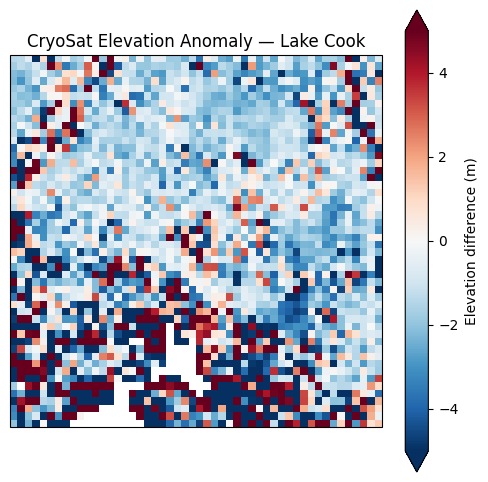

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

ax.coastlines()

anomaly.plot(
    ax=ax,
    transform=ccrs.SouthPolarStereo(),
    cmap="RdBu_r",
    vmin=-5,
    vmax=5,
    cbar_kwargs={'label': 'Elevation difference (m)'}
)

plt.title("CryoSat Elevation Anomaly — Lake Cook")
plt.show()


In [23]:
cryosat_small.isel(time=0).shape == rema_matched.shape


True

In [24]:
print(cryosat_small.x.equals(rema_matched.x))
print(cryosat_small.y.equals(rema_matched.y))


False
False


In [25]:
target = cryosat_small.isel(time=0)

target = target.rio.set_spatial_dims("x", "y")
target = target.rio.write_crs("EPSG:3031")


In [28]:
rema_matched = rema_small.interp_like(target)


In [48]:
import glob

files = sorted(glob.glob(
    r"C:/Users/Ashley Howard/ESS569/MLGEO2026_Subglacial_Lakes/Notebooks/cryosat_downloads/CS_OFFL_THEM_GRID__ANTARCTIC_*_V201.nc"
))

print(len(files))


118


In [47]:
ds = xr.open_mfdataset(
    files,
    combine="nested",
    concat_dim="time",
    engine="netcdf4"
)

elevation = elevation.rio.set_spatial_dims("x", "y")
elevation = elevation.rio.write_crs("EPSG:3031")
elevation.to_netcdf("cryosat_all_timesteps2.nc")


C:\Users\Ashley Howard\AppData\Local\Temp\ipykernel_6064\1148282497.py:1: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'x' ('x',) The recommendation is to set join explicitly for this case.
  ds = xr.open_mfdataset(
C:\Users\Ashley Howard\AppData\Local\Temp\ipykernel_6064\1148282497.py:1: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'y' ('y',) The recommendation is to set join explicitly for this case.
  ds = xr.open_mfdataset(
C:\Users\Ashley Howard\AppData\Local\Temp\ipykernel_6064\1148282497.py:1: FutureWarn

In [43]:
elevation = ds[list(ds.data_vars)[0]]
print(elevation)


<xarray.DataArray 'elevation' (x: 2750, y: 2350, time: 118)> Size: 3GB
dask.array<concatenate, shape=(2750, 2350, 118), dtype=float32, chunksize=(2650, 2250, 1), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float32 11kB -2.699e+06 -2.697e+06 ... 2.797e+06 2.799e+06
  * y        (y) float32 9kB -2.399e+06 -2.397e+06 ... 2.297e+06 2.299e+06
  * time     (time) int32 472B 1295049600 1297728000 ... 1605398400 1607990400
Attributes:
    units:      metres
    long_name:  CryoTEMPO-EOLIS: Gridded Elevation


In [53]:
target = elevation.isel(time=0)
target = target.rio.set_spatial_dims("x", "y")
target = target.rio.write_crs("EPSG:3031")

rema_matched = rema_small.interp_like(target)


In [54]:
anomaly = elevation - rema_matched


In [55]:
lake_small = anomaly.sel(
    x=slice(xmin, xmax),
    y=slice(ymin, ymax)
)


In [56]:
print(lake_small.shape)


(50, 50, 118)


In [60]:
# Correct if y decreases southwards (EPSG:3031)
lake_anomaly = anomaly.sel(
    x=slice(xmin, xmax),
    y=slice(ymax, ymin)   # note ymax first if y decreases
)


In [67]:
print(ymin)

-1402199.9713924103


In [68]:
cryosat_small = elevation.sel(
    x=slice(xmin, xmax),
    y=slice(ymin, ymax)
)

print(cryosat_small)

<xarray.DataArray 'elevation' (x: 50, y: 50, time: 118)> Size: 1MB
dask.array<getitem, shape=(50, 50, 118), dtype=float32, chunksize=(50, 50, 1), chunktype=numpy.ndarray>
Coordinates:
  * x            (x) float32 200B 4.79e+05 4.81e+05 ... 5.75e+05 5.77e+05
  * y            (y) float32 200B -1.401e+06 -1.399e+06 ... -1.303e+06
  * time         (time) int32 472B 1295049600 1297728000 ... 1607990400
    spatial_ref  int64 8B 0
Attributes:
    units:      metres
    long_name:  CryoTEMPO-EOLIS: Gridded Elevation


In [69]:
rema_small = rema.rio.clip_box(
    xmin,
    ymin,
    xmax,
    ymax
)

print(rema_small)

<xarray.DataArray (y: 1001, x: 1001)> Size: 4MB
[1002001 values with dtype=float32]
Coordinates:
  * y            (y) float64 8kB -1.302e+06 -1.302e+06 ... -1.402e+06 -1.402e+06
  * x            (x) float64 8kB 4.772e+05 4.774e+05 ... 5.772e+05 5.772e+05
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0


In [70]:
cryosat_small = cryosat_small.rio.write_crs("EPSG:3031")
cryosat_small = cryosat_small.rio.set_spatial_dims(x_dim="x", y_dim="y")
rema_small = rema_small.rio.set_spatial_dims(x_dim="x", y_dim="y")

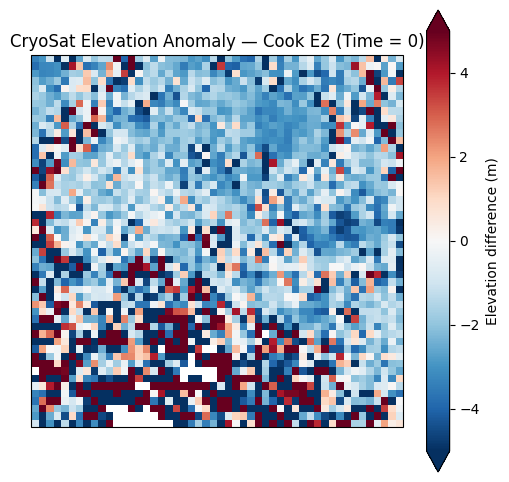

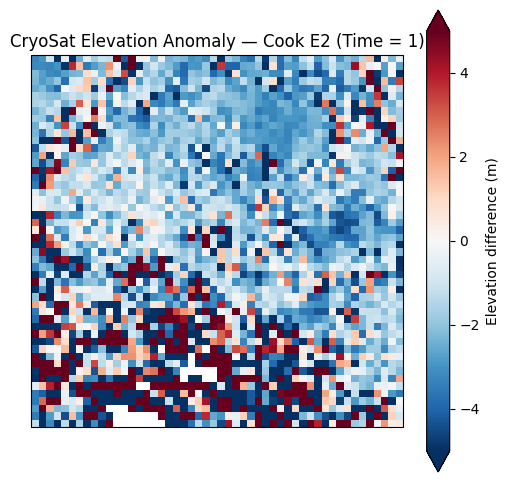

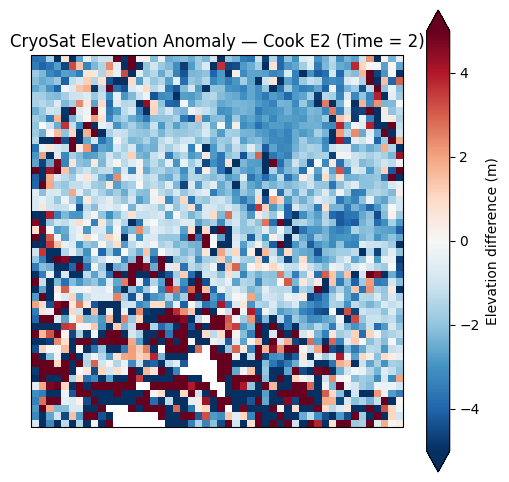

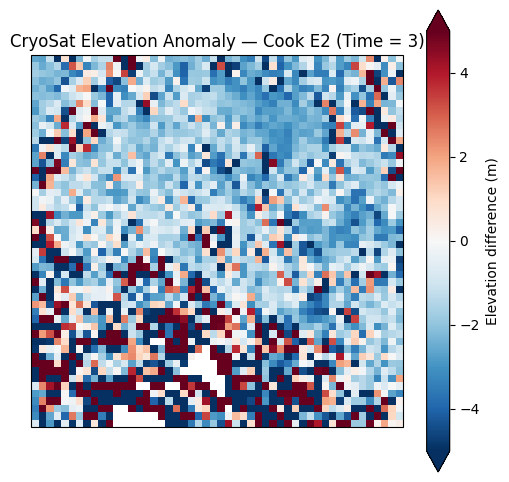

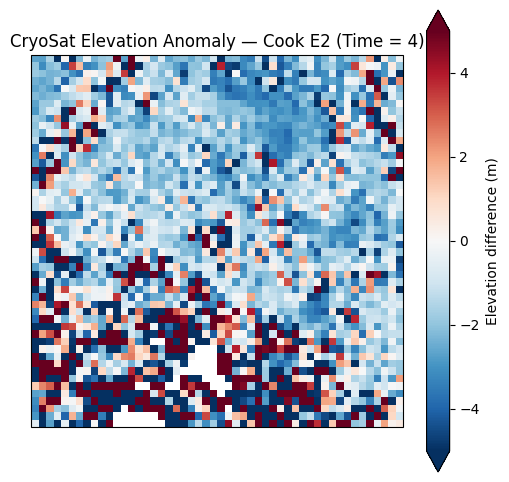

In [74]:
for i in range(5):
    anomaly = cryosat_small.isel(time=i) - rema_matched
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes(projection=ccrs.SouthPolarStereo())

    anomaly.plot(
        ax=ax,
        transform=ccrs.SouthPolarStereo(),
        cmap="RdBu_r",
        vmin=-5,
        vmax=5,
        cbar_kwargs={'label': 'Elevation difference (m)'}
    )
    plt.title(f"CryoSat Elevation Anomaly — Cook E2 (Time = {i})")
    plt.show()
